# Study of EPIC228735255

### Clearing the events in the lightcurve:

I'll start by downloading and plotting the tpf and lc for the concerned object:

C:\Users\pierr\Anaconda3\lib\site-packages\lightkurve\search.py:144: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


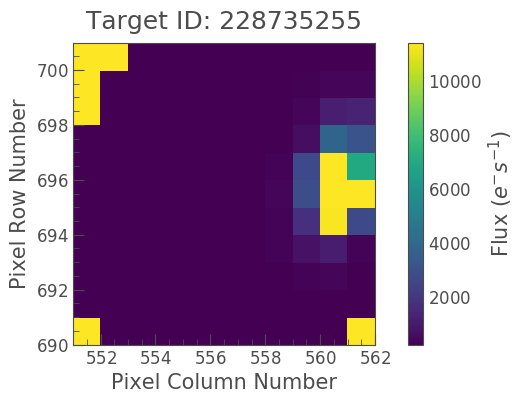

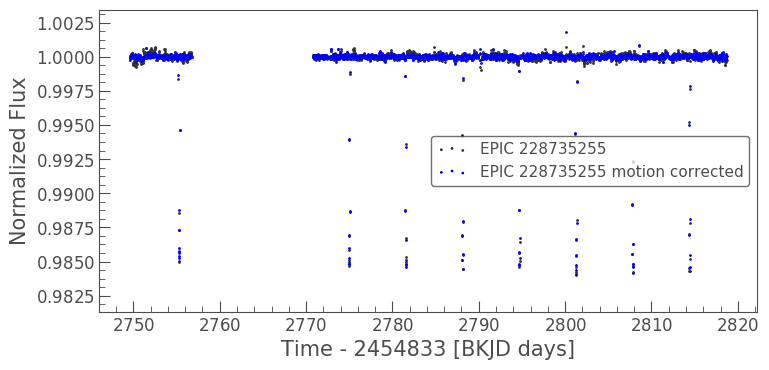

In [15]:
%matplotlib inline
import numpy as np
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile
target = '228735255'

tpf = search_targetpixelfile(target).download()
tpf.plot()
lc = search_lightcurvefile(target).download().PDCSAP_FLUX.flatten(window_length=301).remove_nans().remove_outliers(sigma_lower=100,sigma_upper=0.4)
ax = lc.scatter()
corr_lc = lc.to_corrector("sff").correct(windows=40)
corr_lc_f, trend = corr_lc.flatten(window_length=301, return_trend=True)
corr_lc_f.scatter(ax=ax,color='b',label='EPIC 228735255 motion corrected')

We can see a clear period in this lightcurve, now i'll try finding this period using the **box least squares method**:

We can iterate this method to find a more precise result:

And one more iteration:

In [ ]:
bls = BoxLeastSquares(corr_lc_f.time, corr_lc_f.flux, corr_lc_f.flux_err)
periods = np.arange(6.567, 6.572, 0.00001)
durations = np.arange(0.005, 0.15, 0.0001)
periodogram = bls.power(periods, durations)

plt.plot(periodogram.period, periodogram.power)
plt.ylabel("Power")
plt.xlabel("Period [day]");
best_fit = periods[np.argmax(periodogram.power)]
print('Best Fit Period: {:0.4f} days'.format(best_fit))

From this, we get that the period is 6.56

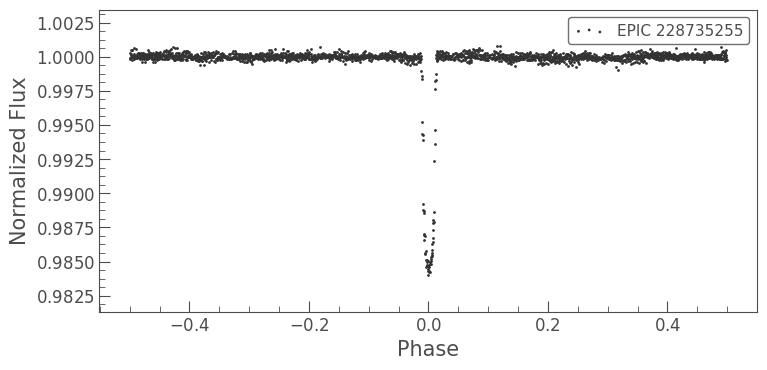

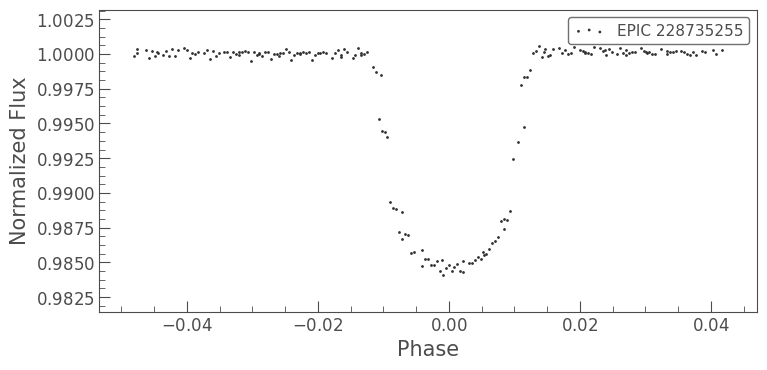

In [18]:
lcf = lc.fold(period=best_fit,t0=2.355)
lcf.scatter()
lc_transit = lcf[1000:1200]
lc_transit.scatter()
lcf.time_format = 'jd'

I will now save this lightcurve to use it directly afterwards:

In [19]:
hdu = lc_transit.to_fits(path='EPIC_228735255_transit.fits', overwrite=True)

### Analysing the object:

Now, knowing that the concerned star's radius is $0.987 R_\odot = 9.8258 R_{Jup}$, and using the formula:
$$ \dfrac{\Delta F}{F} = \dfrac{R_p^2}{R_\odot^2} $$
we can compute the object's radius:

In [25]:
import math

R_planet = math.sqrt(1-min(lcf.flux))*9.825783972
print('Planet\'s radius: ' + str(R_planet) + ' R_jup')

Planet's radius: 1.2431794472767708 R_jup
